<a href="https://colab.research.google.com/github/Aquinate22/Capstone-Project/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Problem Statement**

Disease and Prognosis on breast cancer

# **INTRODUCTION TO CANCER - A GENERAL OVERVIEW**


Cancer is a complex and diverse group of diseases characterized by the uncontrolled growth and division of abnormal cells in the body. Normally, cells grow, divide, and die in an orderly fashion, but cancer disrupts this process, leading to the formation of masses or tumors that can invade nearby tissues and spread to other parts of the body (a process known as metastasis).

There are over 100 different types of cancer, each classified based on the specific type of cell where it originates. Some of the most common types of cancer include breast cancer, lung cancer, prostate cancer, colorectal cancer, and skin cancer.




#**Breast Cancer**

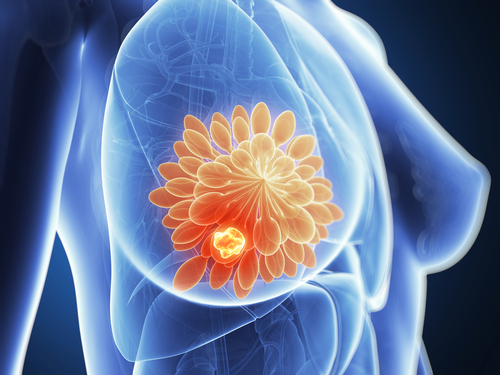


Breast cancer is a prevalent type of cancer that develops in the breast tissue, mainly in the ducts or lobules. It primarily affects women, but men can also develop breast cancer, although it is much rarer. Research shows that 1 in 8 women and 1 in 1000 men suffer from it. Breast cancer can vary widely in its behavior and response to treatment, which is why it is essential to detect and diagnose it at an early stage. Breast cancer can be classified as:
*  Non-invasive(or in situ): When it is localised to the area of the breast where it originated.
*  Invasive: When the neoplasm is able to spread through the lymphatic system and blood.

Types of Breast Cancer Lumps:

1. **Benign Breast Lumps**(non-cancerous)

2. **Ductal Carcinoma In Situ** (DCIS): DCIS is considered non-invasive and is highly treatable when detected early.

3. **Invasive Ductal Carcinoma** (IDC): This is the most common type of breast cancer, accounting for about 70-80% of all cases. If left untreated, IDC can metastasize to other parts of the body.

4. **Invasive Lobular Carcinoma** (ILC): This type of breast cancer begins in the milk-producing lobules and can spread to nearby tissues. ILC accounts for about 10-15% of all breast cancer cases.

5. **Triple-Negative Breast Cancer**: This is an aggressive form of breast cancer that tends to grow and spread rapidly and often has limited treatment options.

6. **HER2-Positive Breast Cancer**: This type of breast cancer has an overexpression of the HER2 protein, which promotes cancer cell growth. HER2-positive breast cancers are often more aggressive.


Breast cancer is a significant health concern worldwide, but advancements in early detection and treatment have improved survival rates. Understanding the different types of breast lumps and their potential implications can help individuals and healthcare professionals identify breast cancer at an earlier stage, leading to better outcomes for patients.

Regular breast self-examinations, clinical screenings, and mammograms are essential components of breast cancer awareness and prevention strategies. If you notice any changes or abnormalities in your breast tissue, it's crucial to consult a healthcare professional for further evaluation and appropriate management.

In our project we shall use mammogram images to pin point whether the breast tissue is benign or malignant. A mammogram is a specific type of medical imaging procedure used to examine the breast tissue for signs of abnormalities, particularly for the early detection of breast cancer. It is considered one of the most effective screening tools for breast cancer and has proven to be instrumental in reducing breast cancer-related mortality.

# **Business Understanding**


The development of our mammogram diagnosis and prognosis web app stems from an understanding of the challenges faced by healthcare professionals in interpreting mammograms and providing timely diagnoses for breast diseases.

By creating an app that harnesses the power of AI and machine learning, we aim to bridge this gap and hence providing a robust solution for healthcare professionals. Our app will leverage advanced algorithms and large datasets to enhance accuracy, consistency and efficiency in mammogram interpretation.

The business value of our app lies in its ability to enable healthcare professionals with a reliable tool that expedites early detection and diagnosis of breast diseases. Medical professionals will be able to make quicker and more accurate decisions, facilitating early intervention, and potentially improving treatment success rates. Morever, the app's real-time reporting and alerting capabilities will enable healthcare providers to prioritize urgent cases, ensuring timely intervention and reducing the risk of disease progression.

From a business perspective, our app has the potential to establish itself as an indispensable tool in the field of breast disease diagnosis. It's widespread adoption first in the Kenyan market could lead to increased efficiency in healthcare workflows, reduced healthcare costs associated with misdiagnosis and delayed treatment, and ultimately improved patient satisfaction and outcomes.

Overall, our apps business understanding revolves around addressing the existing challenges in mammogram interpretation, improving diagnostic accuracy, empowering healthcare professionals and ultimately contributing to the early detection and effective treatment of breast diseases.

## **Objectives of our Project**:


*   To develop a model that can assist in early detection of breast cancer.
*   To improve the accuracy and precision of breast cancer diagnosis.
*   Reducing the False Positive "recall" rates for mammograms.


#**Data Understanding**


In our project, we shall use mammogram images and their lables as our base of our web application. Mammograms are primarily used to identify any abnormalities or changes in breast tissue that may indicate the presence of a tumor or other abnormalities. The data set used can be downloaded from https://drive.google.com/file/d/12umDKmXJ8--ZmuiTrchSQRCs8SmRl12h/view?usp=sharing.

We extracted the zip file and got four files:

*  train - contains the images we will use to train our model.

*  Training_set.csv - this csv file has contains the labels for the training images

*  test - contains 1900+ images. We will use the images to test our model.

*  Testing_set.csv

*  sample_submission



#**Loading the dataset**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import glob
import cv2
import random
import os
from os import listdir
import shutil
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import adam
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


In [94]:
#Loading the training set CSV
df = pd.read_csv("/content/drive/MyDrive/mammography_images/mammography_images/Training_set.csv")

In [95]:
df.head()

,filename,label
0,Image_1.jpg,Density3Benign
1,Image_2.jpg,Density1Benign
2,Image_3.jpg,Density1Malignant
3,Image_4.jpg,Density1Benign
4,Image_5.jpg,Density1Malignant


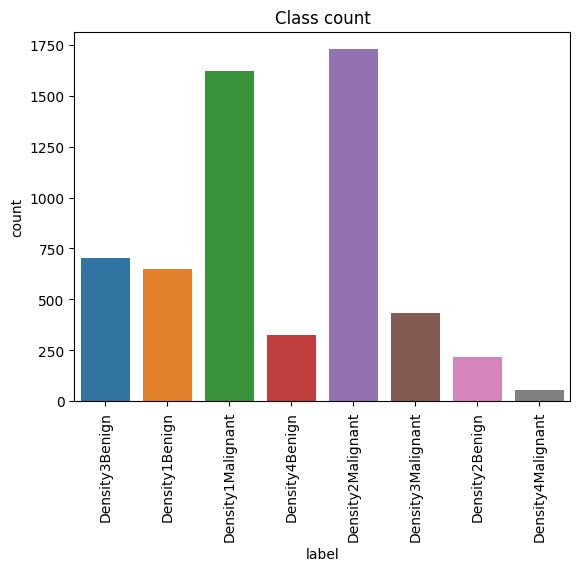

In [96]:
# Plotting the labels in the CSV
sns.countplot(x=df['label'])
plt.title("Class count")
plt.xticks(rotation=90);

In [ ]:
# Remove "Density" and numerical part from labels
df_2 = df
df_2['label'] = df['label'].str.replace('Density\d', '')

<ipython-input-6-480180bf8a44>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['label'] = df['label'].str.replace('Density\d', '')


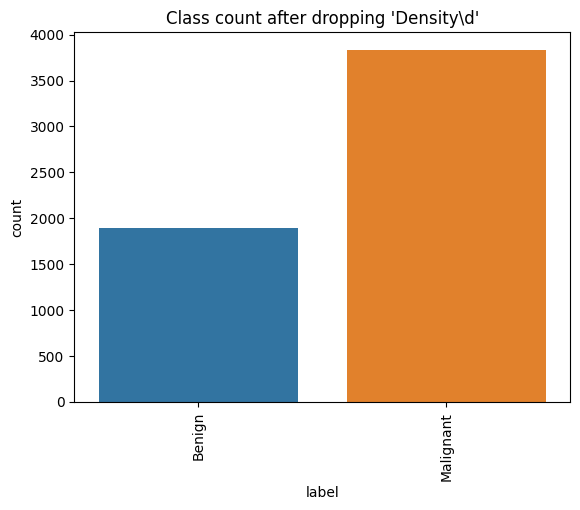

In [97]:
# Plotting labels in df_2
sns.countplot(x=df_2['label'])
plt.title("Class count after dropping 'Density\d'")
plt.xticks(rotation=90);

In [ ]:
import os
import pandas as pd
import shutil

# Path to the train CSV file
csv_path = "/content/drive/MyDrive/mammography_images/mammography_images/Training_set.csv"

# Path to the train folder
train_folder = "/content/drive/MyDrive/mammography_images/mammography_images/train"

# Read the train CSV file using pandas
df = pd.read_csv(csv_path)

# Remove "Density" and numerical part from labels
df_2 = df
df_2['label'] = df_2['label'].str.replace('Density\d', '')

# Iterate over each row in the CSV file
for index, row in df_2.iterrows():
    # Extract the class label and image file name
    class_label = row['label']
    image_file = row['filename']

    # Create a subdirectory for the class label if it doesn't exist
    class_folder = os.path.join(train_folder, class_label)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Move the image file to the appropriate class subdirectory
    src_path = os.path.join(train_folder, image_file)
    dst_path = os.path.join(class_folder, image_file)

    # Check if the image file has already been moved
    if not os.path.exists(dst_path):
        shutil.move(src_path, dst_path)
    else:
        print(f"Image '{image_file}' already moved to its class subdirectory.")

print("Image organization completed.")


<ipython-input-8-a268d38ba6b7>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['label'] = df_2['label'].str.replace('Density\d', '')


Streaming output truncated to the last 5000 lines.
Image 'Image_726.jpg' already moved to its class subdirectory.
Image 'Image_727.jpg' already moved to its class subdirectory.
Image 'Image_728.jpg' already moved to its class subdirectory.
Image 'Image_729.jpg' already moved to its class subdirectory.
Image 'Image_730.jpg' already moved to its class subdirectory.
Image 'Image_731.jpg' already moved to its class subdirectory.
Image 'Image_732.jpg' already moved to its class subdirectory.
Image 'Image_733.jpg' already moved to its class subdirectory.
Image 'Image_734.jpg' already moved to its class subdirectory.
Image 'Image_735.jpg' already moved to its class subdirectory.
Image 'Image_736.jpg' already moved to its class subdirectory.
Image 'Image_737.jpg' already moved to its class subdirectory.
Image 'Image_738.jpg' already moved to its class subdirectory.
Image 'Image_739.jpg' already moved to its class subdirectory.
Image 'Image_740.jpg' already moved to its class subdirectory.
Imag

#**Exploring the data image classes**

The train set now contains two classes:


*   Benign
*   Malignant


###**Benign**

In [ ]:
# Path to the directory containing the images
benign_directory = "/content/drive/MyDrive/mammography_images/mammography_images/train/Benign"

#  list of all files in the benign directory
files = os.listdir(benign_directory)

# Count the number of image files
image_count = sum(1 for file in files)

# Print the result
print("Number of image files: ", image_count)


Number of image files:  1890


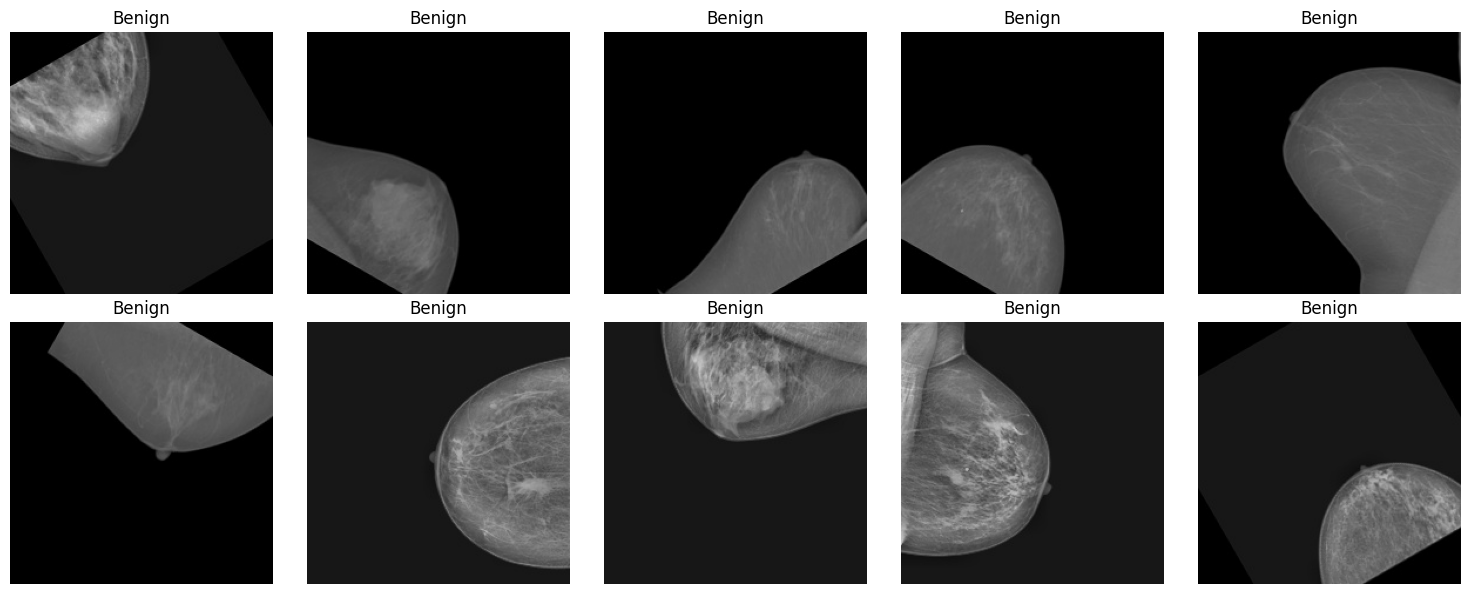

In [ ]:
# List of all the image files in the benign directory
image_files = [f for f in os.listdir(benign_directory) if os.path.isfile(os.path.join(benign_directory, f))]

# Select the first 10 image files
files = image_files[:10]

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Iterate over each image file
for i, image_file in enumerate(files):

    image_path = os.path.join(benign_directory, image_file)

    # Open the image using PIL
    image = Image.open(image_path)

    # Plot the image on the corresponding subplot
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(f"Benign")
    ax.axis('off')

plt.tight_layout()
plt.show()


###**Malignant**

In [ ]:
# Path to the directory containing the images
malignant_directory = "/content/drive/MyDrive/mammography_images/mammography_images/train/Malignant"

#  list of all files in the malignant directory
files = os.listdir(malignant_directory)

# Count the number of image files
image_count = sum(1 for file in files)

# Print the result
print("Number of image files: ", image_count)


Number of image files:  3834


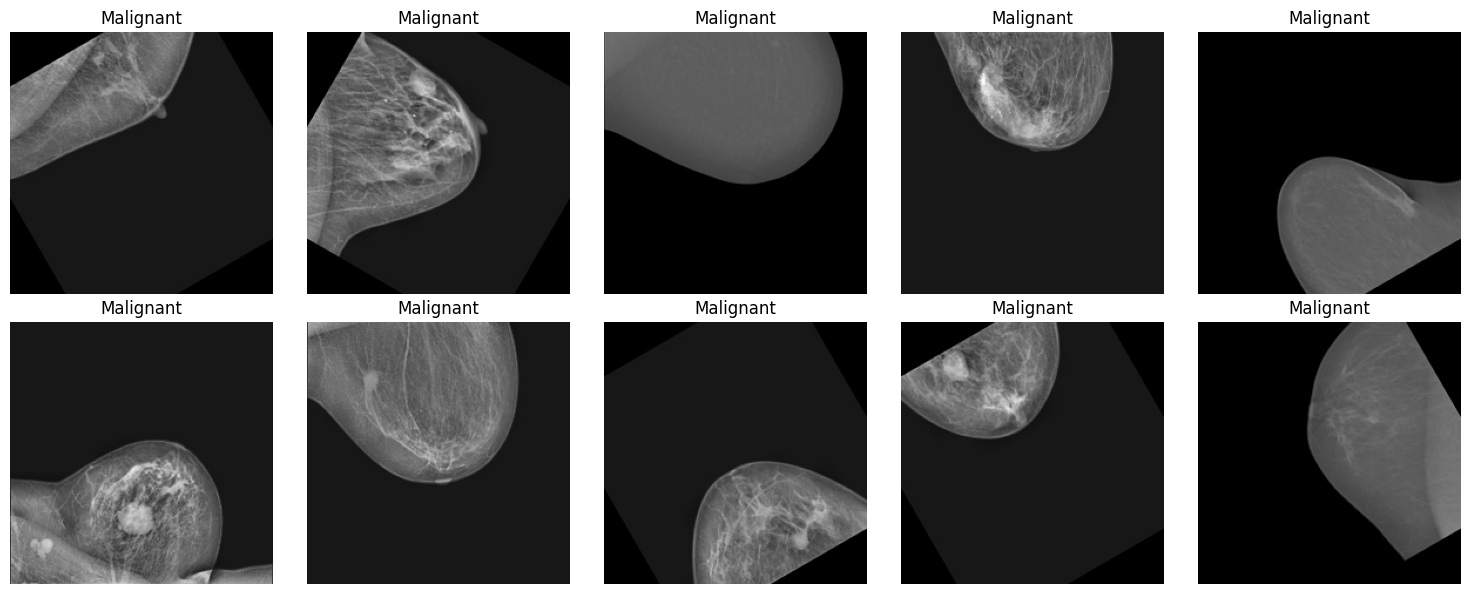

In [ ]:
# list of all the image files in the malignant directory
image_files = [f for f in os.listdir(malignant_directory) if os.path.isfile(os.path.join(malignant_directory, f))]

# Select the first 10 image files
files = image_files[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Iterate over each image file
for i, image_file in enumerate(files):

    image_path = os.path.join(malignant_directory, image_file)

    # Open the image using PIL
    image = Image.open(image_path)

    # Plot the image on the corresponding subplot
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(f"Malignant")
    ax.axis('off')

plt.tight_layout()
plt.show()


#**Preprocess the data**

In [ ]:
#original image shape
image = Image.open('/content/drive/MyDrive/mammography_images/mammography_images/train/Benign/Image_1.jpg')

# Get the shape of the image
image_shape = image.size

# Print the shape
print("Image shape (width, height):", image_shape)


Image shape (width, height): (224, 224)


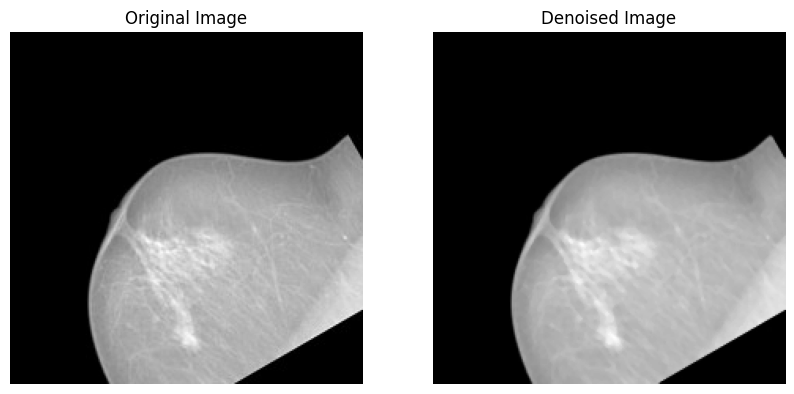

In [98]:
#Change the image into grayscale
# Denoising the image by applying median filter

# Load the input image (grayscale)
image_path = '/content/drive/MyDrive/mammography_images/mammography_images/train/Malignant/Image_1009.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


#median blur-denoising the image
kernel_size = 3
denoised_image = cv2.medianBlur(image, kernel_size)


# Overwrite the  image with the denoised image
cv2.imwrite(image_path, denoised_image)


# Display the original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()

In [ ]:
# Directory containing the images to preprocess
directory = '/content/drive/MyDrive/mammography_images/mammography_images/train'

# Directory to store the preprocessed images
output_directory = '/content/drive/MyDrive/mammography_images/mammography_images/train_denoised'

# Directory to store the backup of the original images
backup_directory = '/content/drive/MyDrive/mammography_images/mammography_images/train_backup'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create the backup directory if it doesn't exist
os.makedirs(backup_directory, exist_ok=True)

# Loop through all image files in the input directory
for root, _, filenames in os.walk(directory):
    for filename in filenames:
        if filename.endswith('.jpg'):
            # Check if the denoised image already exists
            input_path = os.path.join(root, filename)
            output_path = os.path.join(output_directory, os.path.relpath(input_path, directory))
            if os.path.exists(output_path):
                print(f"Skipping {filename}. Preprocessed image already exists.")
                continue

            # Load the input image (grayscale)
            image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

            # Save a copy of the original image in the backup directory
            backup_path = os.path.join(backup_directory, os.path.relpath(input_path, directory))
            os.makedirs(os.path.dirname(backup_path), exist_ok=True)
            shutil.copy2(input_path, backup_path)

#**Data Augmentation**


In [ ]:
batch_size = 32
image_height = 150
image_width = 150
seed =123

In [99]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,           # Normalize pixel values to [0, 1]
    rotation_range=20,             # Random rotation between -20 and 20 degrees
    width_shift_range=0.1,         # Random horizontal shift of up to 10% of the image width
    height_shift_range=0.1,        # Random vertical shift of up to 10% of the image height
    horizontal_flip=True,          # Randomly flip images horizontally
    vertical_flip=False            # Don't flip images vertically for mammograms
)

In [ ]:
# Checking if the images are in gray scale
from PIL import Image

# Load the image
image = Image.open('/content/drive/MyDrive/mammography_images/mammography_images/train/Benign/Image_1002.jpg')

# Check the number of color channels
num_channels = image.getbands()

if len(num_channels) == 3:
    print("The image is colored.")
elif len(num_channels) == 1:
    print("The image is grayscale.")
else:
    print("The image has an unexpected number of channels.")

The image is colored.


In [ ]:
directory = '/content/drive/MyDrive/mammography_images/mammography_images/train'

# Splitting our dataset into 80% train and 20% validation


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 5724 files belonging to 2 classes.
Using 4580 files for training.


In [ ]:
# Getting our validation set
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 5724 files belonging to 2 classes.
Using 1144 files for validation.


In [100]:
len(train_ds)

144

In [101]:
len(val_ds)

36

##**Visualizing images in train_ds**

In [ ]:
# Classes we have in our trained dataset
class_names = train_ds.class_names
print(class_names)

['Benign', 'Malignant']


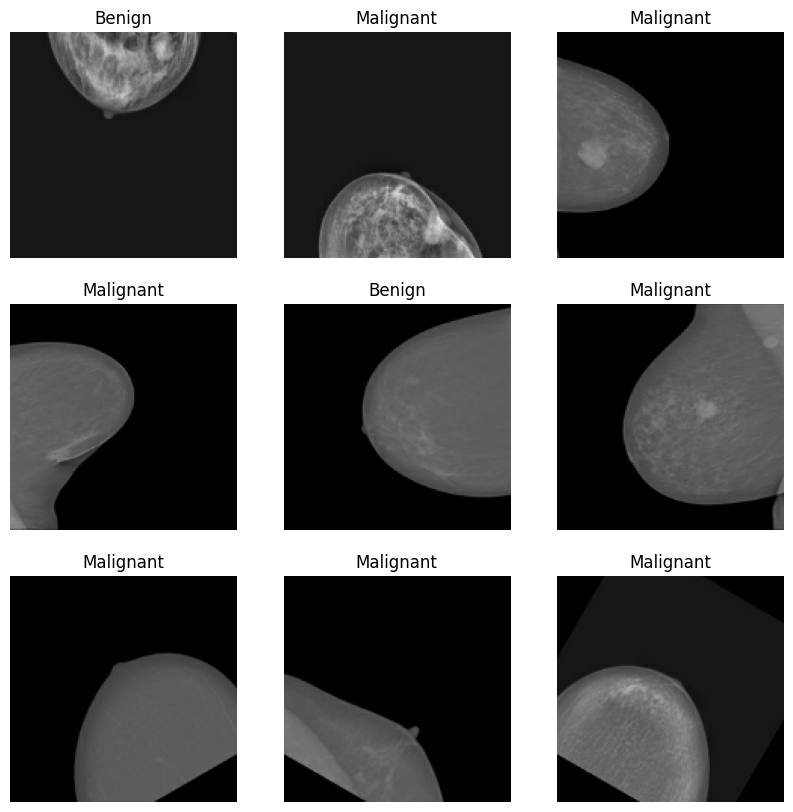

In [ ]:
# Visualizing an image in our trained dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Autotuning our images for optimization
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Modeling**

We shall choose and train a machine learning model using the training data. For our data that is medical images & require classification, we shall use convolutional neural networks (CNNs).


# **Base Model**

This step will include :

*   building a model architecture
*   compiling the model
*   fitting the model to the training data



In [ ]:
#instantiate a sequential model
model = Sequential()

In [ ]:
#adding the layers to the model
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(image_height, image_width, 3))),
model.add(MaxPooling2D(3,3)),

model.add(Conv2D(64, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(64, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(32, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Flatten()),
model.add(Dense(256, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

In [ ]:
METRICS = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')]

In [ ]:
# Compiling our model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
144/144 [==============================] - 760s 5s/step - loss: 0.7990 - accuracy: 0.6452 - precision: 0.6654 - recall: 0.9372 - val_loss: 0.6214 - val_accuracy: 0.6906 - val_precision: 0.6918 - val_recall: 0.9962
Epoch 2/25
144/144 [==============================] - 3s 19ms/step - loss: 0.6349 - accuracy: 0.6620 - precision: 0.6671 - recall: 0.9806 - val_loss: 0.6216 - val_accuracy: 0.6914 - val_precision: 0.6969 - val_recall: 0.9798
Epoch 3/25
144/144 [==============================] - 3s 19ms/step - loss: 0.6234 - accuracy: 0.6688 - precision: 0.6735 - recall: 0.9734 - val_loss: 0.6147 - val_accuracy: 0.6862 - val_precision: 0.6996 - val_recall: 0.9570
Epoch 4/25
144/144 [==============================] - 3s 19ms/step - loss: 0.6099 - accuracy: 0.6812 - precision: 0.6891 - recall: 0.9477 - val_loss: 0.6351 - val_accuracy: 0.6617 - val_precision: 0.7061 - val_recall: 0.8748
Epoch 5/25
144/144 [==============================] - 3s 20ms/step - loss: 0.5854 - accuracy: 0.6952

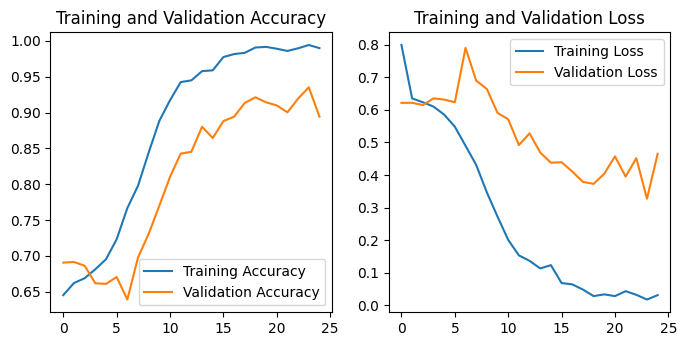

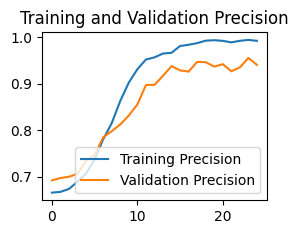

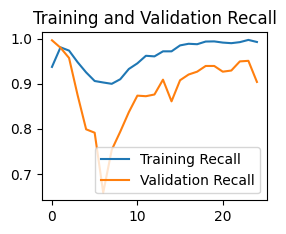

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

pre = history.history['precision']
val_pre = history.history['val_precision']

re = history.history['recall']
val_re = history.history['val_recall']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.subplot(2, 2, 3)
plt.plot(epochs_range, pre, label='Training Precision')
plt.plot(epochs_range, val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation Precision')
plt.show()

plt.subplot(2, 2, 4)
plt.plot(epochs_range, re, label='Training Recall')
plt.plot(epochs_range, val_re, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')
plt.show()



#**Base Model Evaluation**

In [ ]:
# Evaluate on validation dataset
score = model.evaluate(val_ds, verbose=False)
print('Val loss:', score[0])
print('Val accuracy:', score[1])
print('Val precision:', score[2])
print('Val recall:', score[3])

Val loss: 0.465172678232193
Val accuracy: 0.8942307829856873
Val precision: 0.9407894611358643
Val recall: 0.9039191007614136


#**A more sophisticated model**

### **Class Imbalance** - correcting class imbalance

In [ ]:
total_img = df_2['label'].size

benign = df_2[df_2['label'] == 'Benign'].shape[0]
malignant = total_img - benign

print('\n    Total: {}\n    Benign: {} ({:.2f}% of total)\n'.format(
        total_img, benign, 100 * benign / total_img))


    Total: 5724
    Benign: 1890 (33.02% of total)



In [ ]:
initial_bias = np.log([benign/malignant])
initial_bias

array([-0.70733182])

### **Set the class weights**

Since there are fewer benign images, we want these images to have more weight in our model. By increasing the weight of these benign images, the model will pay more attention to them, and this will help balance out the difference in quantity.

In [ ]:
weight_for_benign = (1 / benign)*(total_img)/2.0
weight_for_malignant = (1 / malignant)*(total_img)/2.0

class_weight = {0: weight_for_benign, 1: weight_for_malignant}

print('Weight for class benign: {:.2f}'.format(weight_for_benign))
print('Weight for class malignant: {:.2f}'.format(weight_for_malignant))

Weight for class benign: 1.51
Weight for class malignant: 0.75


Build and fit a model with the class imbalance on train_ds

In [ ]:
# More convolution layers
# Increase the maxpooling
# Fit the model with class weights and datagen
model = Sequential()

In [ ]:
# Adding the layers to the model
model.add(Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(image_height, image_width, 3))),
model.add(MaxPooling2D(3,3)),

model.add(Conv2D(64, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(32, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(16, (3,3), padding='same', activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Flatten()),
model.add(Dense(256, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=METRICS)


In [ ]:
# Fitting the model
history = model.fit(train_ds,
                     epochs = epochs,
                     validation_data = val_ds,
                     class_weight=class_weight)

144/144 [==============================] - 10s 43ms/step - loss: 0.8384 - accuracy: 0.4900 - precision: 0.7395 - recall: 0.5545 - val_loss: 0.7070 - val_accuracy: 0.4598 - val_precision: 0.7224 - val_recall: 0.3552
Epoch 2/25
144/144 [==============================] - 6s 39ms/step - loss: 0.6962 - accuracy: 0.5111 - precision: 0.6914 - recall: 0.4772 - val_loss: 0.6973 - val_accuracy: 0.4764 - val_precision: 0.6959 - val_recall: 0.4311
Epoch 3/25
144/144 [==============================] - 5s 37ms/step - loss: 0.6909 - accuracy: 0.5190 - precision: 0.6989 - recall: 0.4850 - val_loss: 0.6925 - val_accuracy: 0.4930 - val_precision: 0.7025 - val_recall: 0.4627
Epoch 4/25
144/144 [==============================] - 6s 41ms/step - loss: 0.6802 - accuracy: 0.5751 - precision: 0.7200 - recall: 0.5899 - val_loss: 0.6880 - val_accuracy: 0.5175 - val_precision: 0.7064 - val_recall: 0.5171
Epoch 5/25
144/144 [==============================] - 5s 38ms/step - loss: 0.6683 - accuracy: 0.5821 - precisi

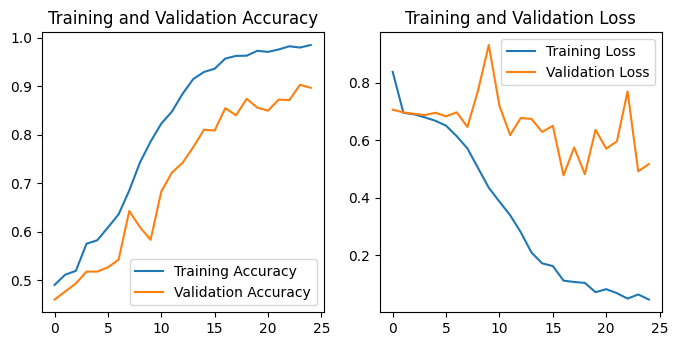

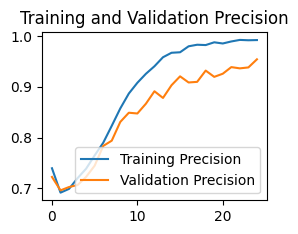

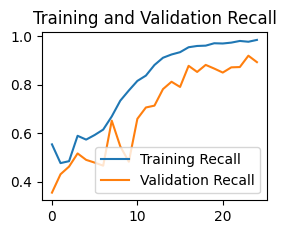

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

pre = history.history['precision']
val_pre = history.history['val_precision']

re = history.history['recall']
val_re = history.history['val_recall']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.subplot(2, 2, 3)
plt.plot(epochs_range, pre, label='Training Precision')
plt.plot(epochs_range, val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation Precision')
plt.show()

plt.subplot(2, 2, 4)
plt.plot(epochs_range, re, label='Training Recall')
plt.plot(epochs_range, val_re, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')
plt.show()




#**Evaluate the performance of the more sophisticated model**

In [ ]:
# Evaluate on validation dataset
score = model.evaluate(val_ds, verbose=False)
print('Val loss:', score[0])
print('Val accuracy:', score[1])
print('Val precision:', score[2])
print('Val recall:', score[3])

Val loss: 0.5176053047180176
Val accuracy: 0.8968531489372253
Val precision: 0.9541160464286804
Val recall: 0.8938053250312805


#**Pretrained Model-VGG16**

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=((image_height, image_width, 3)))
base_model.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid',
                              )
    ])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#Fitting the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50,
  class_weight = class_weight
)

Epoch 1/50
144/144 [==============================] - 20s 107ms/step - loss: 0.5846 - accuracy: 0.7240 - precision: 0.8695 - recall: 0.7525 - val_loss: 0.3683 - val_accuracy: 0.8287 - val_precision: 0.8537 - val_recall: 0.9077
Epoch 2/50
144/144 [==============================] - 12s 81ms/step - loss: 0.3252 - accuracy: 0.8596 - precision: 0.9277 - recall: 0.8554 - val_loss: 0.2786 - val_accuracy: 0.8846 - val_precision: 0.9013 - val_recall: 0.9355
Epoch 3/50
144/144 [==============================] - 12s 82ms/step - loss: 0.2172 - accuracy: 0.9175 - precision: 0.9581 - recall: 0.9159 - val_loss: 0.2312 - val_accuracy: 0.9126 - val_precision: 0.9638 - val_recall: 0.9077
Epoch 4/50
144/144 [==============================] - 12s 82ms/step - loss: 0.1419 - accuracy: 0.9528 - precision: 0.9767 - recall: 0.9517 - val_loss: 0.1604 - val_accuracy: 0.9388 - val_precision: 0.9604 - val_recall: 0.9507
Epoch 5/50
144/144 [==============================] - 12s 82ms/step - loss: 0.0939 - accuracy: 

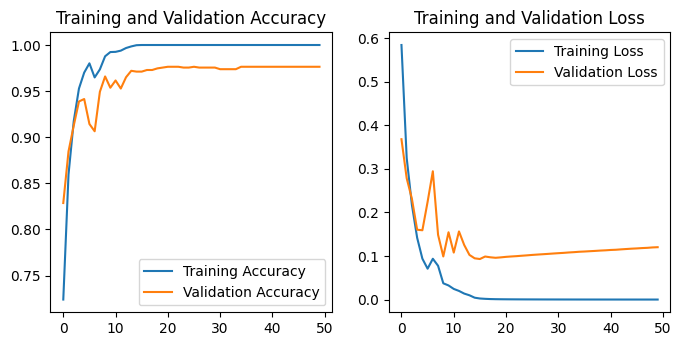

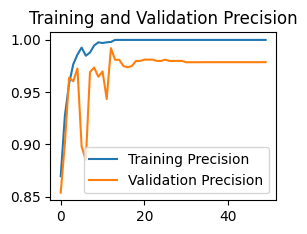

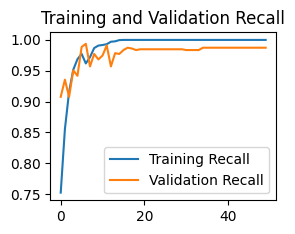

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

pre = history.history['precision']
val_pre = history.history['val_precision']

re = history.history['recall']
val_re = history.history['val_recall']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.subplot(2, 2, 3)
plt.plot(epochs_range, pre, label='Training Precision')
plt.plot(epochs_range, val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation Precision')
plt.show()

plt.subplot(2, 2, 4)
plt.plot(epochs_range, re, label='Training Recall')
plt.plot(epochs_range, val_re, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')
plt.show()



In [ ]:
# Saving the model
model.save('/content/drive/MyDrive/mammography_images/mammography_images/Model/BC_diagnosis.h5')

#**Evaluate Pretrained Model**

In [ ]:
# Evaluate on validation dataset
score = model.evaluate(val_ds, verbose=False)
print('Val loss:', score[0])
print('Val accuracy:', score[1])
print('Val precision:', score[2])
print('Val recall:', score[3])

Val loss: 0.12026354670524597
Val accuracy: 0.9763985872268677
Val precision: 0.9786967635154724
Val recall: 0.9873577952384949


##**Predicting using test**

In [ ]:
import os
from PIL import Image
import glob

# subdirectory contains test path
subdirectory_path = '/content/drive/MyDrive/mammography_images/mammography_images/test'

# Obtain list of image file paths in the subdirectory
image_file_paths = glob.glob(os.path.join(subdirectory_path, '*.jpg'))

# Assuming you want to resize the images to a fixed size for the model
desired_image_size = (image_height, image_width)

# Load and preprocess the images
test_data = []

for image_path in image_file_paths:
    image = Image.open(image_path)
    # Resize
    image = image.resize(desired_image_size)
    # Convert the image to an array of numerical values (numpy array)
    image_array = np.array(image)

    test_data.append(image_array)



In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/mammography_images/mammography_images/Model/BC_diagnosis.h5')


In [ ]:
# Generate predictions using the loaded model
import numpy as np
predictions = model.predict(np.array(test_data))



7/7 [==============================] - 1s 69ms/step


In [ ]:
# get the predicted class label
predicted_labels = np.argmax(predictions, axis=1)


In [ ]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.preprocessing.image import load_img


5/5 [==============================] - 0s 27ms/step


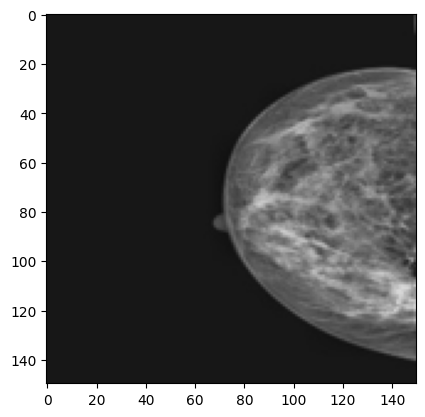

In [ ]:
image_path = "/content/drive/MyDrive/mammography_images/mammography_images/test/Image_1.jpg"
img = Image.open(image_path)
img = img.resize(desired_image_size)

plt.imshow(img)

img = np.expand_dims(img, axis=1)
result = model.predict(img)
plt.show()

In [ ]:
result

# **b) Decision Tree**

In [ ]:
# Import libraries
from PIL import Image
import numpy as np
import pandas as pd
import glob
import os
# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def preprocess_image(image_path, target_size=(100, 100)):
    # Open the image file using Pillow (PIL)
    image = Image.open(image_path)

    # Resize the image to the target size
    image = image.resize(target_size)

    # Convert the image to grayscale
    image = image.convert('L')

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Flatten the image array to a 1D array
    flattened_image = image_array.flatten()

    # Close the image file
    image.close()

    return flattened_image

def load_data_from_folder(combined_folder_path):
    # The subfolders
    subfolders = ['Malignant','Benign']

    X = []  # Image data (features)
    y = []  # Labels (malignant: 0, benign: 1)

    for label, subfolder in enumerate(subfolders):
        subfolder_path = os.path.join(combined_folder_path, subfolder)

        # Walk through the subfolder for all image files
        for root, _, files in os.walk(subfolder_path):
            for image_file in files:
                image_path = os.path.join(root, image_file)

                # Preprocess the image and extract features
                features = preprocess_image(image_path)

                X.append(features)
                y.append(label)

    return np.array(X), np.array(y)

if __name__ == "__main__":
    combined_folder_path = '/content/drive/MyDrive/mammography_images/mammography_images/train'

    # Load data
    X, y = load_data_from_folder(combined_folder_path)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)

In [ ]:
# Number of nodes
n_nodes = model.tree_.node_count
n_nodes

783

In [ ]:
# Depth of tree
print(model.tree_.max_depth)

34


In [ ]:
print(f"The number of terminal nodes is observed to be {model.tree_.node_count} and the depth of the tree is observed to be {model.tree_.max_depth}")

The number of terminal nodes is observed to be 783 and the depth of the tree is observed to be 34


In [ ]:
# Predict on the train and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's accuracy
print(f"testing accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"training accuracy: {accuracy_score(y_train, y_train_pred)}")

testing accuracy: 0.7615720524017467
training accuracy: 1.0


From the above output, the score on the training set is 100%, but the score on the test set is 76%. This implies that the model has an overfitting problem.
Having all these informations means, the complexity of the tree need to be contained.

In [ ]:
model_updated = DecisionTreeClassifier(max_depth=2)
model_updated.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# **Updated Model**

In [ ]:
y_train_pred=model_updated.predict(X_train)
y_test_pred=model_updated.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Decision tree train accuracies: {train_acc:.3f}")
print(f"Decision tree test accuracies: {test_acc:.3f}")

Decision tree train accuracies: 0.683
Decision tree test accuracies: 0.671


From the updated output above, the performance on the training set was 100%, and now it’s only 68%. This implies that the model is no longer memorizing all the outcomes from the training set. This improves the ability of our model to generalize.

# Hyperparameter tuning with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
hpt = DecisionTreeClassifier(random_state = 42)
params = {"max_depth":[1, 2, 3, 4, 5, 7, 10],
              "min_samples_leaf": [1, 3, 6, 10, 20]}

Grid_hpt = GridSearchCV(hpt, params, n_jobs= 1)

In [ ]:
# Create a model from the above
Grid_hpt.fit(X_train, y_train)
# Best parameters
print(Grid_hpt.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1}


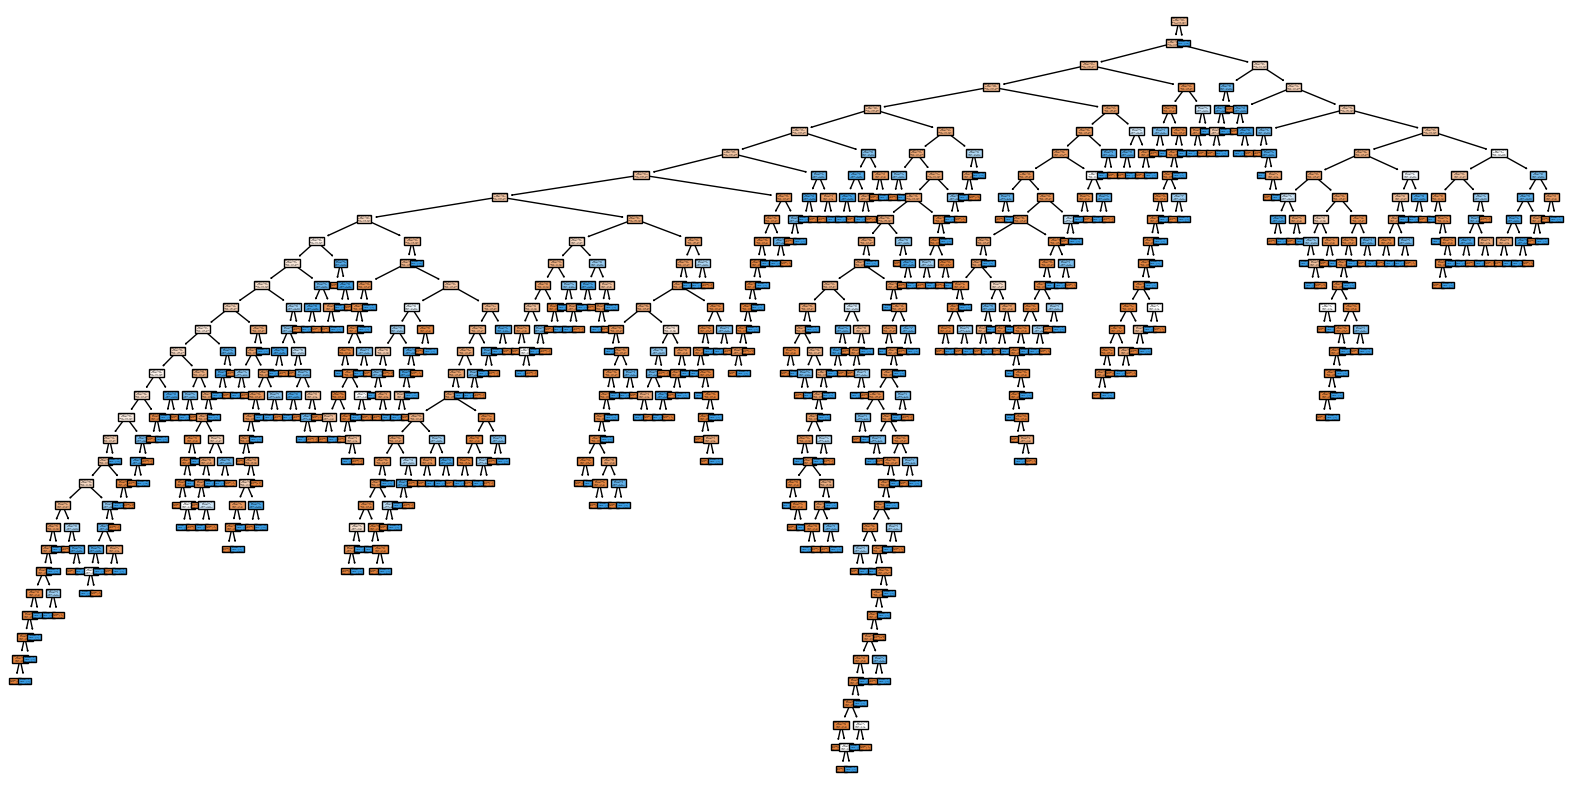

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier (replace this with your Grid_hpt)
clf = DecisionTreeClassifier()

# Train the classifier (replace this with your training process)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=[f'Pixel {i}' for i in range(X_train.shape[1])], class_names=['Benign', 'Malignant'], filled=True)
plt.show()


#**Model Evaluation**

In [ ]:
y_train_pred=Grid_hpt.predict(X_train)
y_test_pred=Grid_hpt.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Decision tree train accuracies: {train_acc:.3f}")
print(f"Decision tree test accuracies: {test_acc:.3f}")

Decision tree train accuracies: 0.792
Decision tree test accuracies: 0.703


In [ ]:
from sklearn.metrics import classification_report

print(f"Classification Report:{classification_report(y_test, y_test_pred)}")


Classification Report:              precision    recall  f1-score   support

           0       0.71      0.95      0.81       756
           1       0.69      0.23      0.35       389

    accuracy                           0.70      1145
   macro avg       0.70      0.59      0.58      1145
weighted avg       0.70      0.70      0.65      1145



In [ ]:
# Our decision-tree model error rate
error_rate = 1 - accuracy_score(y_test_pred,y_test)
print('Error rate is equal to',error_rate)

Error rate is equal to 0.29694323144104806


# **Deployment**- Pretrained model

In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=3262a42456c37e520350ea9afee98085d40b09c2ac091aaaba0ad646ddb4cd25
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [ ]:
! pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install --upgrade streamlit

In [ ]:
from keras.models import load_model
import time
import tensorflow as tf
import requests
from io import BytesIO
import numpy as np
from PIL import Image, ImageOps
import streamlit as st

In [ ]:
def classify(image, model, class_names ):

  #convert image to (150, 150)
  ImageOps.fit(image, (150,150), Image.Resampling.LANCZOS)

  #convert image to numpy array
  image_array = np.asarray(image)

  #normalize image
  normalized_image_array = (image_array.astype(np.float32)/255.0)

  # set model input
  data = np.ndarray(shape=(1,224,224,3), dtype = np.float32)
  data[0] = normalized_image_array

  #make prediction
  prediction = model.predict(data)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  return class_name, confidence_score

st.title("Breast Cancer Image Classification")

st.markdown("Model loaded using VGG16")

st.caption("Choose an Image")

file = st.file_uploader("Upload image", type = ['jpeg', 'jpg', 'png'])

model = load_model("/content/drive/MyDrive/mammography_images/mammography_images/Model/BC_diagnosis.h5")


st.subheader("Classifying.....")
with st.spinner("Wait for it...."):
    time.sleep(10)

class_names = ["Benign", "Malignant"]


# Display the image

if file is not None:
  image = Image.open(file).convert('RGB')
  st.image(image, use_column_width=True)

  class_name, confidence_score = classify(image, model, class_names)

  #write classification
  st.write("##{}".format(class_name))
  st.write("###score{}".format(confidence_score))